In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

## Loading Data

In [202]:
data = pd.read_csv("C:\\Users\\dell\\Desktop\\Mall_data.csv")

In [203]:
data.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


### Pre-processing

In [205]:
data['Item'] = data['Item'].str.lower()

In [206]:
(data['Item']== 'none').value_counts()

False    20507
True       786
Name: Item, dtype: int64

In [207]:
data = data.drop(data[data.Item == 'none'].index)

### Items Exploration

In [208]:
print ("Total no. of items in the given dataset : ", data['Item'].nunique())

Total no. of items in the given dataset :  94


In [209]:
print ("Items in the given dataset : \n\n", data['Item'].unique())

Items in the given dataset : 

 ['bread' 'scandinavian' 'hot chocolate' 'jam' 'cookies' 'muffin' 'coffee'
 'pastry' 'medialuna' 'tea' 'tartine' 'basket' 'mineral water'
 'farm house' 'fudge' 'juice' "ella's kitchen pouches" 'victorian sponge'
 'frittata' 'hearty & seasonal' 'soup' 'pick and mix bowls' 'smoothies'
 'cake' 'mighty protein' 'chicken sand' 'coke' 'my-5 fruit shoot'
 'focaccia' 'sandwich' 'alfajores' 'eggs' 'brownie' 'dulce de leche'
 'honey' 'the bart' 'granola' 'fairy doors' 'empanadas' 'keeping it local'
 'art tray' 'bowl nic pitt' 'bread pudding' 'adjustment' 'truffles'
 'chimichurri oil' 'bacon' 'spread' 'kids biscuit' 'siblings'
 'caramel bites' 'jammie dodgers' 'tiffin' 'olum & polenta' 'polenta'
 'the nomad' 'hack the stack' 'bakewell' 'lemon and coconut' 'toast'
 'scone' 'crepes' 'vegan mincepie' 'bare popcorn' 'muesli' 'crisps'
 'pintxos' 'gingerbread syrup' 'panatone' 'brioche and salami'
 'afternoon with the baker' 'salad' 'chicken stew' 'spanish brunch'
 'raspb

In [210]:
print ("Total items purchased : ", data['Item'].count())

Total items purchased :  20507


In [211]:
print ("No. of purchases item-wise : \n\n", 
       data.groupby('Item').size().sort_values(ascending = False).head(20))


No. of purchases item-wise : 

 Item
coffee           5471
bread            3325
tea              1435
cake             1025
pastry            856
sandwich          771
medialuna         616
hot chocolate     590
cookies           540
brownie           379
farm house        374
muffin            370
alfajores         369
juice             369
soup              342
scone             327
toast             318
scandinavian      277
truffles          193
coke              185
dtype: int64


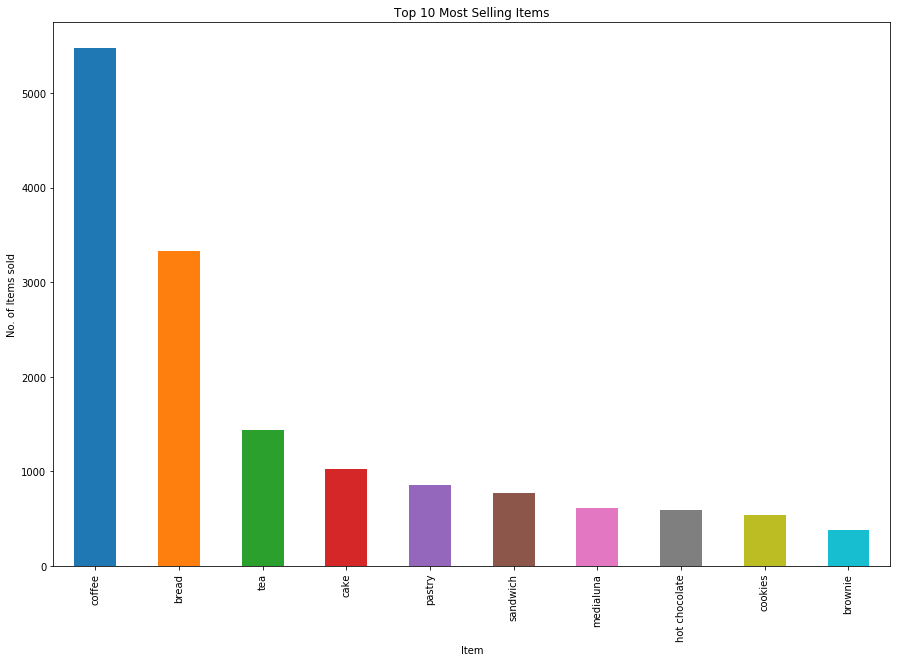

In [212]:
data.groupby('Item').size().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Top 10 Most Selling Items')
plt.ylabel('No. of Items sold')
rcParams['figure.figsize'] = 15, 10
plt.show()

### Understanding how the data is working

In [213]:
combined_data = pd.DataFrame({'items' : data.groupby('Transaction')['Item'].unique(),
                                  'items_count' : data.groupby('Transaction')['Item'].nunique()})
combined_data.reset_index(inplace = True)

combined_data.head(10)

,Transaction,items,items_count
0,1,[bread],1
1,2,[scandinavian],1
2,3,"[hot chocolate, jam, cookies]",3
3,4,[muffin],1
4,5,"[coffee, pastry, bread]",3
5,6,"[medialuna, pastry, muffin]",3
6,7,"[medialuna, pastry, coffee, tea]",4
7,8,"[pastry, bread]",2
8,9,"[bread, muffin]",2
9,10,"[scandinavian, medialuna]",2


### DATE Exploration

In [214]:
print("Given Data from : ", data['Date'].min())
print("Given Data till : ", data['Date'].max())

Given Data from :  2016-10-30
Given Data till :  2017-04-09


In [215]:
print ("Total no. of days in the dataset : ", data['Date'].nunique())

Total no. of days in the dataset :  159


# <font color = "green">Building up Apriori Algorithm </font>

In [216]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Transforming Data

Making items as columns and each transaction as a row and count same items bought in one transaction.

In [217]:
hot_encoded_data = data.groupby(['Transaction','Item'])['Item'].count()
hot_encoded_data.head(10)

Transaction  Item         
1            bread            1
2            scandinavian     2
3            cookies          1
             hot chocolate    1
             jam              1
4            muffin           1
5            bread            1
             coffee           1
             pastry           1
6            medialuna        1
Name: Item, dtype: int64

In [218]:
hot_encoded_data = hot_encoded_data.unstack()
hot_encoded_data.head(10)

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
hot_encoded_data = hot_encoded_data.reset_index().set_index('Transaction')
hot_encoded_data.head(10)

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
hot_encoded_data = hot_encoded_data.fillna(0)
hot_encoded_data.head(10)

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_data = hot_encoded_data.applymap(encode_units)

In [222]:
frequent_itemsets = apriori(hot_encoded_data, min_support=0.01, use_colnames=True)

**Metric Involved :**
    - Support
    - Confidence
    - Lift
    - Leverage
    - Conviction
    
We are using **"Lift"** metric

**A - antecedent  and  C - consequent**
- - - - 
**Support** : Frequently of the item in the dataset.

                      support(A→C) = support(A ∪ C), range: [0,1]

The 'support' metric then computes the support of the combined itemset A∪C -- note that 'support' depends on 'antecedent support' and 'consequent support' via min('antecedent support', 'consequent support')
- - - - 
**Confidence** : How often the rule has been found to be true.

                 confidence(A→C) = support(A→C) / support(A), range: [0,1]

The confidence of a rule A->C is the probability of seeing the consequent in a transaction given that it also contains the antecedent. Note that the metric is not symmetric or directed; for instance, the confidence for A->C is different than the confidence for C->A. The confidence is 1 (maximal) for a rule A->C if the consequent and antecedent always occur together. 
- - - - 
**Lift**
The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent. If A and C are independent, the Lift score will be exactly 1. 

                      lift(A→C) = confidence(A→C) / support(C), range: [0,∞]
                      
- - - - 
**Leverage**
Leverage computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent. An leverage value of 0 indicates independence.

                   levarage(A→C) = support(A→C) − support(A) × support(C), range: [−1,1]
                   
- - - -
**Conviction**
A high conviction value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.

                       conviction(A→C) = 1 − support(C) / 1 − confidence(A→C), range: [0,∞]

In [223]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold = 1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(tea),(cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
1,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
2,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
3,(coffee),(pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740
4,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
5,(coffee),(hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749
6,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
7,(coffee),(cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841
8,(brownie),(coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
9,(coffee),(brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080


### Rules where confidence is greater than or equal to 50% so:

In [224]:
rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
4,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
6,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
10,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
14,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
20,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
22,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
26,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
30,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
32,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384


### Let's understand

A = toast   C = Coffee

From the rule above we can clearly see that - toast and coffee are commonly bought together.

**Support = 0.023666**
Calculated by dividing the no. of transactions containing toast divided by total number of transactions

- - - - 
**Confidence = 0.704403**
 70.44% of all the toast transactions contain coffee
    
- - - - 
**Lift = 1.472431**
Therefore, coffee is 1.47 times more likely to be bought by the customers who buy toast compared to the default likelihood of the sale of coffee.
